In [ ]:
!pip install vaderSentiment scikit-learn pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# Load the Excel file (assuming the file contains a column 'News URL' with the news links)
file_path = '/content/bajaj_finance_news_urls.xlsx'  # Update this path based on your setup
df = pd.read_excel(file_path)

# Preview the DataFrame
print(df.head())


                                            News URL  sentiment_score
0  https://news.google.com/read/CBMirgFBVV95cUxOZ...           0.9999
1  https://news.google.com/read/CBMijgFBVV95cUxPU...           0.9995
2  https://news.google.com/read/CBMi0wFBVV95cUxPR...           0.9983
3  https://news.google.com/read/CBMixwFBVV95cUxQb...           0.9999
4  https://news.google.com/read/CBMiywFBVV95cUxNV...           0.9999


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   News URL         50 non-null     object 
 1   sentiment_score  625 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.9+ KB


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the news content
df['sentiment_score'] = df['news_content'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

# Preview the DataFrame with sentiment scores
print(df[['news_content', 'sentiment_score']].head())
output_file_path = 'C:\\Users\\NEW\\Desktop\\bajaj_finance_sentiment_scores.xlsx'
df.to_excel(output_file_path, index=False)


                                        news_content  sentiment_score
0  Credit Cards Loans Banking Mortgages Insurance...           0.9999
1  Credit Cards Loans Banking Mortgages Insurance...           0.9995
2  Credit Cards Loans Banking Mortgages Insurance...           0.9983
3  Credit Cards Loans Banking Mortgages Insurance...           0.9999
4  Credit Cards Loans Banking Mortgages Insurance...           0.9999


In [ ]:
pip install yfinance


In [ ]:
import yfinance as yf

# Fetch stock price data for Bajaj Finance (BAJFINANCE.NS)
stock_data = yf.download('BAJFINANCE.NS', start='2024-01-01', end='2024-08-01')

# Preview the stock data
print(stock_data.head())

# Merge stock data with sentiment data on a common date field (you might need to adjust for timezone and date formats)
# Ensure both stock_data and df have a 'Date' column in the same format


[*********************100%***********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2024-01-01  7336.950195  7336.950195  7273.000000  7299.049805  7262.590820   
2024-01-02  7324.000000  7445.100098  7280.049805  7430.049805  7392.936523   
2024-01-03  7444.950195  7485.850098  7368.200195  7384.799805  7347.912598   
2024-01-04  7560.000000  7733.950195  7560.000000  7705.549805  7667.060059   
2024-01-05  7734.950195  7789.000000  7673.100098  7711.149902  7672.632324   

             Volume  
Date                 
2024-01-01   331489  
2024-01-02  1112990  
2024-01-03   553405  
2024-01-04  2911879  
2024-01-05  1052601  


In [ ]:
print(stock_data.columns)


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [ ]:
# Reset the index to move 'Date' from the index to a column
stock_data.reset_index(inplace=True)

# Check if 'Date' is now a column
print(stock_data.head())
output_file_path = 'C:\\Users\\NEW\\Desktop\\bajaj_finance_stock_data.xlsx'
stock_data.to_excel(output_file_path, index=False)


        Date         Open         High          Low        Close    Adj Close  \
0 2024-01-01  7336.950195  7336.950195  7273.000000  7299.049805  7262.590820   
1 2024-01-02  7324.000000  7445.100098  7280.049805  7430.049805  7392.936523   
2 2024-01-03  7444.950195  7485.850098  7368.200195  7384.799805  7347.912598   
3 2024-01-04  7560.000000  7733.950195  7560.000000  7705.549805  7667.060059   
4 2024-01-05  7734.950195  7789.000000  7673.100098  7711.149902  7672.632324   

    Volume  
0   331489  
1  1112990  
2   553405  
3  2911879  
4  1052601  


In [ ]:
# Reset index for stock_data if 'Date' is the index
if 'Date' not in stock_data.columns:
    stock_data.reset_index(inplace=True)

# Ensure the 'Date' column is present in stock_data
print(stock_data.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [ ]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce')
df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')

# Check if the conversion was successful
print(stock_data[['Date']].head())
print(df[['published_at']].head())

        Date
0 2023-01-02
1 2023-01-03
2 2023-01-04
3 2023-01-05
4 2023-01-06
                published_at
0  2021-09-29 17:09:39+00:00
1  2016-06-24 13:50:48-04:00
2  2014-03-25 13:29:45-04:00
3  2009-04-22 19:49:03+00:00
4  2018-04-14 14:59:04+00:00


<ipython-input-50-2d2fad5589e6>:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')


In [ ]:
# Convert 'published_at' to datetime and remove timezone information
df['published_at'] = pd.to_datetime(df['published_at']).dt.tz_localize(None)

# Ensure stock_data['Date'] is also in datetime format
stock_data['Date'] = pd.to_datetime(stock_data.index)

# Merge stock prices with news sentiment on 'Date'
combined_data = pd.merge(stock_data, df[['published_at', 'sentiment_score']], left_on='Date', right_on='published_at', how='inner')

# Preview combined data
print(combined_data.head())


Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, published_at, sentiment_score]
Index: []


In [ ]:
# Convert 'published_at' to datetime and remove timezone information
df['published_at'] = pd.to_datetime(df['published_at']).dt.tz_localize(None)

# Ensure stock_data['Date'] is also in datetime format and remove timezone
stock_data['Date'] = pd.to_datetime(stock_data.index).tz_localize(None)

# Merge stock prices with news sentiment on 'Date'
combined_data = pd.merge(stock_data, df[['published_at', 'sentiment_score']], left_on='Date', right_on='published_at', how='inner')

# Preview combined data
print(combined_data.head())


Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, published_at, sentiment_score]
Index: []


In [ ]:
# Convert 'published_at' to datetime and remove timezone information
df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce').dt.tz_localize(None)

# Check the conversion result
print(df['published_at'].head())
print(df['published_at'].dtypes)  # Ensure it is datetime


0   2021-09-29 17:09:39
1                   NaT
2                   NaT
3   2009-04-22 19:49:03
4   2018-04-14 14:59:04
Name: published_at, dtype: datetime64[ns]
datetime64[ns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              625 non-null    object        
 1   url                625 non-null    object        
 2   published_at       613 non-null    datetime64[ns]
 3   author             397 non-null    object        
 4   publisher          625 non-null    object        
 5   short_description  609 non-null    object        
 6   keywords           625 non-null    object        
 7   header_image       625 non-null    object        
 8   raw_description    594 non-null    object        
 9   description        593 non-null    object        
 10  scraped_at         625 non-null    object        
 11  news_content       625 non-null    object        
 12  sentiment_score    625 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 63.6+ 

In [ ]:
pip install openpyxl


In [ ]:
import pandas as pd

# Save the combined data to an Excel file
output_path = 'combined_data.xlsx'  # You can change the filename and path as needed
combined_data.to_excel(output_path, index=False)

print(f"Combined data saved to {output_path}")


Combined data saved to combined_data.xlsx


In [ ]:
# Check the date range in stock_data
print("Stock Data Date Range:")
print(stock_data['Date'].min(), stock_data['Date'].max())

# Check the date range in df
print("News Data Date Range:")
print(df['published_at'].min(), df['published_at'].max())


Stock Data Date Range:
1970-01-01 00:00:00 1970-01-01 00:00:00.000000244
News Data Date Range:
2006-12-04 19:51:48 2021-10-18 08:00:25


In [ ]:
# Display first few dates from stock_data
print("First few dates in stock_data:")
print(stock_data['Date'].head())

# Display first few dates from df
print("First few published_at dates in df:")
print(df['published_at'].head())


First few dates in stock_data:
0   1970-01-01 00:00:00.000000000
1   1970-01-01 00:00:00.000000001
2   1970-01-01 00:00:00.000000002
3   1970-01-01 00:00:00.000000003
4   1970-01-01 00:00:00.000000004
Name: Date, dtype: datetime64[ns]
First few published_at dates in df:
0   2021-09-29 17:09:39
1                   NaT
2                   NaT
3   2009-04-22 19:49:03
4   2018-04-14 14:59:04
Name: published_at, dtype: datetime64[ns]


In [ ]:
# Check data types
print("Data type of stock_data['Date']:", stock_data['Date'].dtype)
print("Data type of df['published_at']:", df['published_at'].dtype)


Data type of stock_data['Date']: datetime64[ns]
Data type of df['published_at']: datetime64[ns]


In [ ]:
# Unique dates in stock_data
unique_stock_dates = set(stock_data['Date'].dt.date)
print("Unique stock dates:", unique_stock_dates)

# Unique dates in df
unique_news_dates = set(df['published_at'].dt.date)
print("Unique news dates:", unique_news_dates)

# Check intersection
print("Common dates:", unique_stock_dates.intersection(unique_news_dates))


Unique stock dates: {datetime.date(1970, 1, 1)}
Unique news dates: {NaT, datetime.date(2017, 6, 16), datetime.date(2006, 12, 14), datetime.date(2007, 10, 29), datetime.date(2017, 3, 12), datetime.date(2010, 3, 19), datetime.date(2019, 10, 24), datetime.date(2014, 11, 29), datetime.date(2016, 5, 18), datetime.date(2018, 6, 22), datetime.date(2012, 10, 10), datetime.date(2014, 7, 18), datetime.date(2016, 12, 7), datetime.date(2013, 2, 25), datetime.date(2016, 8, 11), datetime.date(2016, 1, 20), datetime.date(2007, 3, 16), datetime.date(2011, 8, 16), datetime.date(2014, 3, 19), datetime.date(2017, 3, 15), datetime.date(2006, 12, 4), datetime.date(2014, 6, 3), datetime.date(2018, 2, 28), datetime.date(2014, 12, 18), datetime.date(2016, 3, 16), datetime.date(2015, 11, 24), datetime.date(2012, 8, 9), datetime.date(2008, 1, 3), datetime.date(2007, 2, 16), datetime.date(2019, 11, 8), datetime.date(2021, 6, 17), datetime.date(2008, 6, 26), datetime.date(2009, 9, 25), datetime.date(2013, 11, 7),

In [ ]:
import pandas as pd

# Assuming you have two DataFrames: stock_data and news_data
# Replace `your_stock_data` and `your_news_data` with your actual DataFrames

# Remove invalid stock dates
stock_data_cleaned = stock_data[stock_data['Date'] != pd.Timestamp('1970-01-01')]

# Remove rows with NaT in news data
news_data_cleaned = df.dropna(subset=['published_at'])

# Convert dates to datetime.date if they are not already
stock_data_cleaned['Date'] = pd.to_datetime(stock_data_cleaned['Date']).dt.date
news_data_cleaned['published_at'] = pd.to_datetime(news_data_cleaned['published_at']).dt.date

# Now, you can check unique dates again
unique_stock_dates = set(stock_data_cleaned['Date'])
unique_news_dates = set(news_data_cleaned['published_at'])

print("Unique stock dates:", unique_stock_dates)
print("Unique news dates:", unique_news_dates)


Unique stock dates: {datetime.date(1970, 1, 1)}
Unique news dates: {datetime.date(2017, 6, 16), datetime.date(2006, 12, 14), datetime.date(2007, 10, 29), datetime.date(2017, 3, 12), datetime.date(2010, 3, 19), datetime.date(2019, 10, 24), datetime.date(2014, 11, 29), datetime.date(2016, 5, 18), datetime.date(2018, 6, 22), datetime.date(2012, 10, 10), datetime.date(2014, 7, 18), datetime.date(2016, 12, 7), datetime.date(2013, 2, 25), datetime.date(2016, 8, 11), datetime.date(2016, 1, 20), datetime.date(2007, 3, 16), datetime.date(2011, 8, 16), datetime.date(2014, 3, 19), datetime.date(2017, 3, 15), datetime.date(2006, 12, 4), datetime.date(2014, 6, 3), datetime.date(2018, 2, 28), datetime.date(2014, 12, 18), datetime.date(2016, 3, 16), datetime.date(2015, 11, 24), datetime.date(2012, 8, 9), datetime.date(2008, 1, 3), datetime.date(2007, 2, 16), datetime.date(2019, 11, 8), datetime.date(2021, 6, 17), datetime.date(2008, 6, 26), datetime.date(2009, 9, 25), datetime.date(2013, 11, 7), date

<ipython-input-68-b1a25c820588>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_cleaned['Date'] = pd.to_datetime(stock_data_cleaned['Date']).dt.date
<ipython-input-68-b1a25c820588>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data_cleaned['published_at'] = pd.to_datetime(news_data_cleaned['published_at']).dt.date


In [ ]:
output_file_path = 'C:\\Users\\NEW\\Desktop\\bajaj_finance_stock_data.xlsx'
stock_data.to_excel(output_file_path, index=False)

In [ ]:
combined_data=pd.read_excel('/content/final.xlsx')

In [ ]:
# Create a label for price movement: 1 if stock price increased, 0 if it decreased
combined_data['price_movement'] = combined_data['Close'].pct_change().apply(lambda x: 1 if x > 0 else 0)

# Features: sentiment score, previous day's close, and possibly others
combined_data['previous_close'] = combined_data['Close'].shift(1)

# Drop rows with missing values (due to shifts or missing data)
combined_data.dropna(inplace=True)

# Features (X) and target (y)
X = combined_data[['sentiment_score', 'Open', 'High', 'Low','Close', 'Adj Close', 'Volume','previous_close']]  # Add more features if needed
y = combined_data['price_movement']

# Preview the feature set
print(X.head(), y.head())


   sentiment_score         Open         High          Low        Close  \
2           0.9983  7444.950195  7485.850098  7368.200195  7384.799805   
3           0.9999  7560.000000  7733.950195  7560.000000  7705.549805   
4           0.9999  7734.950195  7789.000000  7673.100098  7711.149902   
5           0.9995  7677.000000  7830.000000  7631.299805  7736.000000   
6           0.9999  7774.000000  7810.000000  7698.000000  7725.450195   

     Adj Close   Volume  previous_close  
2  7347.912598   553405     7430.049805  
3  7667.060059  2911879     7384.799805  
4  7672.632324  1052601     7705.549805  
5  7697.358398  1121209     7711.149902  
6  7686.861328  1247083     7736.000000   2    0
3    1
4    1
5    1
6    0
Name: price_movement, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n {conf_matrix}')


Accuracy: 0.7857142857142857
Confusion Matrix:
 [[15  5]
 [ 4 18]]


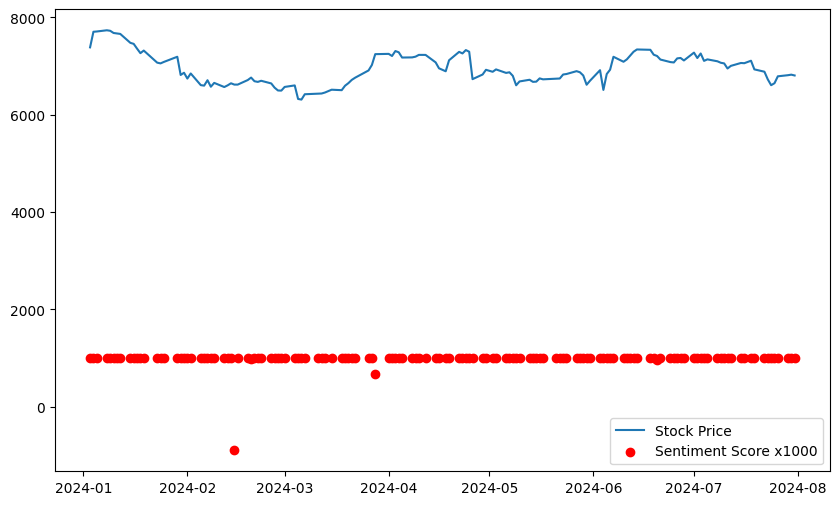

In [ ]:
import matplotlib.pyplot as plt

# Plot stock prices with sentiment scores
plt.figure(figsize=(10,6))
plt.plot(combined_data['Date'], combined_data['Close'], label='Stock Price')
plt.scatter(combined_data['Date'], combined_data['sentiment_score']*1000, color='r', label='Sentiment Score x1000')
plt.legend()
plt.show()
